In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt 

I decided to do a deep dive into the [`sklearn.DecisionTree documentation`](http://scikit-learn.org/stable/modules/tree.html#tree) since they touch on the various flavours of DecisionTree available like ID3, C4.5, C5.0 and CART. They also include some tips on practical use of trees.  

In [3]:
df = pd.read_feather('../../data/interim/titanic_numerical_train')

In [4]:
df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         3
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         3
3            4         1       1    0  35.0      1      0  53.1000         3
4            5         0       3    1  35.0      0      0   8.0500         3

In [5]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df[['Survived']]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

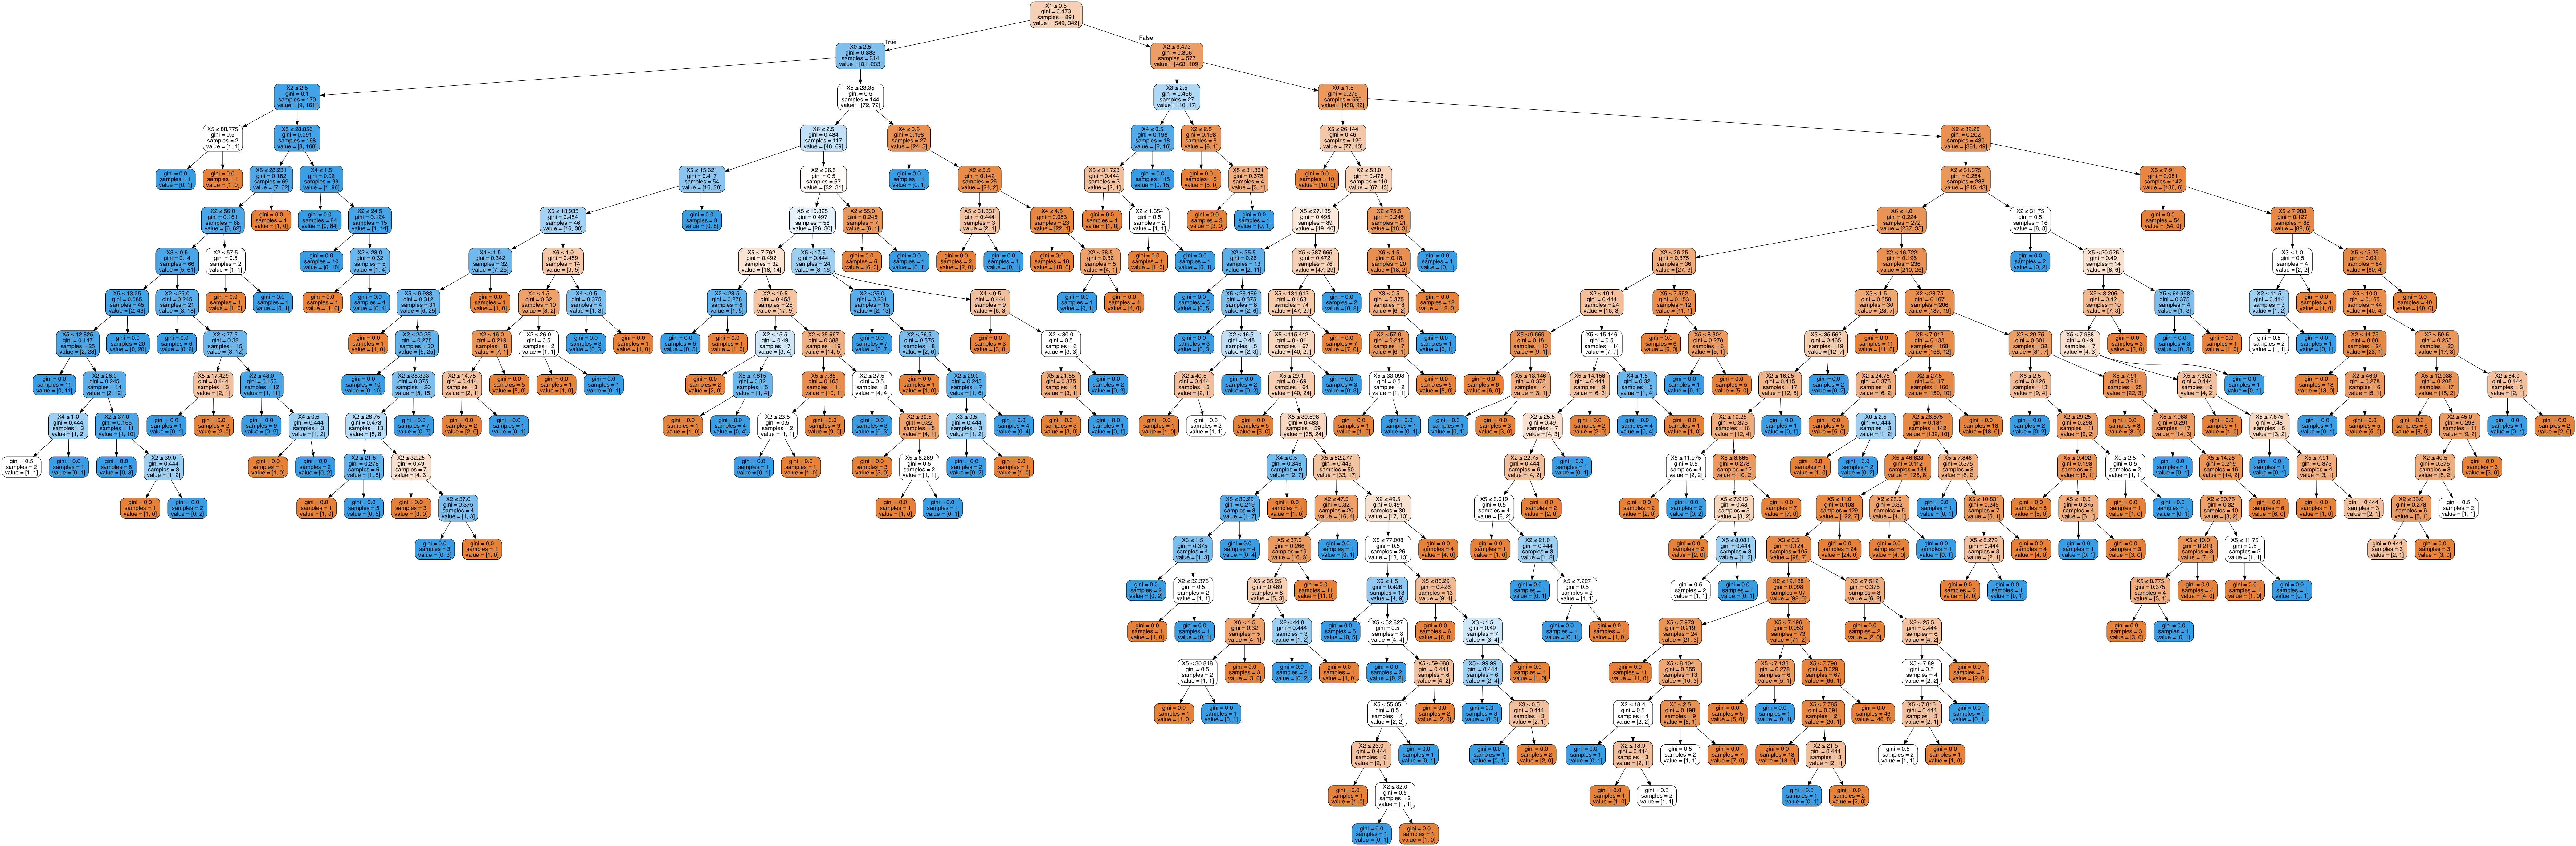

In [8]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz 

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [9]:
clf.score(X_test, y_test)

0.9888268156424581

In [10]:
clf.decision_path(X_train)

<712x411 sparse matrix of type '<class 'numpy.int64'>'
	with 7709 stored elements in Compressed Sparse Row format>

<Container object of 7 artists>

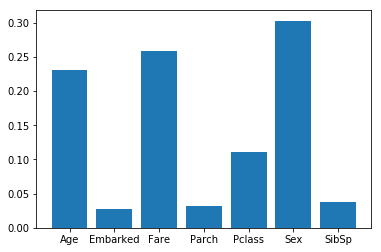

In [11]:
plt.bar(X_train.columns, clf.feature_importances_)

In [13]:
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [14]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test, clf.predict(X_test))

array([[106,   0],
       [  2,  71]])